In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

import americangut.agplots_parse as agpar
import americangut.notebook_environment as agenv
import americangut.diversity_analysis as agdiv
import americangut.plots as agplots
import americangut.util as agu

import matplotlib.pyplot as plt

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
map_fp = agu.get_existing_path(agenv.paths['meta']['ag-cleaned-md'])
tax_fp = agu.get_existing_path(agenv.paths['taxa']['100nt']['L2']['ag-tsv'])

In [32]:
map_ = pd.read_csv(map_fp, sep='\t', dtype=str)
map_.set_index('#SampleID', inplace=True)

tax = pd.read_csv(tax_fp, sep='\t', dtype=str, header=1)
tax.set_index('#OTU ID', inplace=True)
tax = tax.transpose()
for col in tax.columns:
    tax[col] = tax[col].apply(lambda x: float(x)).astype(float)

In [33]:
phyla = {t : t.split(';')[1].replace('p__', '').replace('[', 'contested ').replace(']', '')
         for t in tax.columns
         }
tax = tax.rename(columns=phyla)

In [34]:
map_ = map_.loc[tax.index]

In [35]:
fecal_tax = tax.loc[map_.SIMPLE_BODY_SITE == 'FECAL']
skin_tax = tax.loc[map_.SIMPLE_BODY_SITE == 'SKIN']
oral_tax = tax.loc[map_.SIMPLE_BODY_SITE == 'ORAL']

In [58]:
most_common = np.array(['Firmicutes', 'Bacteroidetes', 'Proteobacteria', 
                        'Actinobacteria', 'Verrucomicrobia', 'Tenericutes',
                        'Cyanobacteria', 'Fusobacteria'])

In [84]:
fecal_tax.sort_values('Firmicutes', inplace=True, ascending=False)
skin_tax.sort_values('Firmicutes', inplace=True, ascending=False)
oral_tax.sort_values('Firmicutes', inplace=True, ascending=False)

/Users/jdebelius/miniconda2/envs/americangut/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/jdebelius/miniconda2/envs/americangut/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
/Users/jdebelius/miniconda2/envs/americangut/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.h

In [86]:
fecal_tax['Other'] = 1 - fecal_tax[most_common].sum(1)
oral_tax['Other'] = 1 - oral_tax[most_common].sum(1)
skin_tax['Other'] = 1 - skin_tax[most_common].sum(1)

/Users/jdebelius/miniconda2/envs/americangut/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/jdebelius/miniconda2/envs/americangut/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
/Users/jdebelius/miniconda2/envs/americangut/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [63]:
np.sum(fecal_tax[most_common[[0, 1]]], 1)

10317.000022905    1.000000
10317.000001061    1.000000
10317.000001125    1.000000
10317.000002309    1.000000
10317.000022688    1.000000
10317.000004711    1.000000
10317.000029371    1.000000
10317.000028746    1.000000
10317.000015121    1.000000
10317.000029340    1.000000
10317.000014316    1.000000
10317.000028078    1.000000
10317.000014962    1.000000
10317.000001501    1.000000
10317.000023083    1.000000
10317.000020430    1.000000
10317.000015043    1.000000
10317.000028772    1.000000
10317.000030959    1.000000
10317.000013232    1.000000
10317.000001249    1.000000
10317.000002449    1.000000
10317.000022617    1.000000
10317.000023000    1.000000
10317.000011365    1.000000
10317.000029465    1.000000
10317.000029296    1.000000
10317.000001917    1.000000
10317.000023060    1.000000
10317.000022903    1.000000
                     ...   
10317.000010850    1.000000
10317.000005038    1.000000
10317.000020663    1.000000
10317.000028087    1.000000
10317.000021167    0

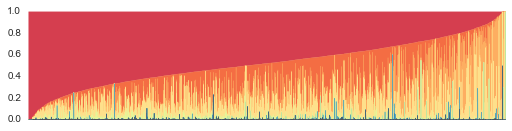

In [94]:
x = np.arange(0, fecal_tax.shape[0])
ax = plt.subplot(1,1,1)
ax.fill_between(x,
                np.sum(fecal_tax[['Other', 'Fusobacteria', 'Cyanobacteria', 'Tenericutes',
                                  'Verrucomicrobia', 'Actinobacteria', 'Proteobacteria',
                                  'Bacteroidetes']], 1),
                np.sum(fecal_tax[['Other', 'Fusobacteria', 'Cyanobacteria', 'Tenericutes',
                                  'Verrucomicrobia', 'Actinobacteria', 'Proteobacteria',
                                  'Bacteroidetes', 'Firmicutes']], 1),
                color='#d53e4f',
                label='Actinobacteria')
ax.fill_between(x,
                np.sum(fecal_tax[['Other', 'Fusobacteria', 'Cyanobacteria', 'Tenericutes',
                                  'Verrucomicrobia', 'Actinobacteria', 'Proteobacteria']], 1),
                np.sum(fecal_tax[['Other', 'Fusobacteria', 'Cyanobacteria', 'Tenericutes',
                                  'Verrucomicrobia', 'Actinobacteria', 'Proteobacteria',
                                  'Bacteroidetes']], 1),
                color='#f46d43',
                label='Actinobacteria')

ax.fill_between(x,
                np.sum(fecal_tax[['Other', 'Fusobacteria', 'Cyanobacteria', 'Tenericutes',
                                  'Verrucomicrobia', 'Actinobacteria']], 1),
                np.sum(fecal_tax[['Other', 'Fusobacteria', 'Cyanobacteria', 'Tenericutes',
                                  'Verrucomicrobia', 'Actinobacteria', 'Proteobacteria']], 1),
                color='#fdae61',
                label='Proteobacteria')

ax.fill_between(x,
                np.sum(fecal_tax[['Other', 'Fusobacteria', 'Cyanobacteria', 'Tenericutes',
                                  'Verrucomicrobia']], 1),
                np.sum(fecal_tax[['Other', 'Fusobacteria', 'Cyanobacteria', 'Tenericutes',
                                  'Verrucomicrobia', 'Actinobacteria']], 1),
                color='#fee08b',
                label='Actinobacteria')

ax.fill_between(x,
                np.sum(fecal_tax[['Other', 'Fusobacteria', 'Cyanobacteria',
                                  'Tenericutes']], 1),
                np.sum(fecal_tax[['Other', 'Fusobacteria', 'Cyanobacteria',
                                  'Tenericutes', 'Verrucomicrobia']], 1),
                color='#fee08b',
                label='Verrucomicrobia')

ax.fill_between(x,
                np.sum(fecal_tax[['Other', 'Fusobacteria', 'Cyanobacteria']], 1),
                np.sum(fecal_tax[['Other', 'Fusobacteria', 'Cyanobacteria',
                                  'Tenericutes']], 1),
                color='#e6f598',
                label='Tenericutes')
ax.fill_between(x,
                np.sum(fecal_tax[['Other', 'Fusobacteria']], 1),
                np.sum(fecal_tax[['Other', 'Fusobacteria', 'Cyanobacteria']], 1),
                color='#abdda4',
                label='Cyanobacteria')
ax.fill_between(x,
                np.sum(fecal_tax[['Other']], 1),
                np.sum(fecal_tax[['Other', 'Fusobacteria']], 1),
                color='#3288bd',
                label='Fusobacteria')
ax.fill_between(x,
                 np.zeros(x.shape),
                 fecal_tax['Other'],
                 color='#525252')
ax.set_xlim([0, len(x)])
ax.set_xticklabels('')
ax.set_ylim([0, 1])
ax.set_position((0.125, 0.125, 0.75, 0.75))
ax.figure.set_size_inches((0.0015*len(x), 2))

ax.figure.savefig('/Users/jdebelius/Desktop/fecal_phylum.pdf')

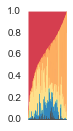

In [95]:
x = np.arange(0, oral_tax.shape[0])
ax = plt.subplot(1,1,1)
ax.fill_between(x,
                np.sum(oral_tax[['Other', 'Fusobacteria', 'Cyanobacteria', 'Tenericutes',
                                  'Verrucomicrobia', 'Actinobacteria', 'Proteobacteria',
                                  'Bacteroidetes']], 1),
                np.sum(oral_tax[['Other', 'Fusobacteria', 'Cyanobacteria', 'Tenericutes',
                                  'Verrucomicrobia', 'Actinobacteria', 'Proteobacteria',
                                  'Bacteroidetes', 'Firmicutes']], 1),
                color='#d53e4f',
                label='Actinobacteria')
ax.fill_between(x,
                np.sum(oral_tax[['Other', 'Fusobacteria', 'Cyanobacteria', 'Tenericutes',
                                  'Verrucomicrobia', 'Actinobacteria', 'Proteobacteria']], 1),
                np.sum(oral_tax[['Other', 'Fusobacteria', 'Cyanobacteria', 'Tenericutes',
                                  'Verrucomicrobia', 'Actinobacteria', 'Proteobacteria',
                                  'Bacteroidetes']], 1),
                color='#f46d43',
                label='Actinobacteria')

ax.fill_between(x,
                np.sum(oral_tax[['Other', 'Fusobacteria', 'Cyanobacteria', 'Tenericutes',
                                  'Verrucomicrobia', 'Actinobacteria']], 1),
                np.sum(oral_tax[['Other', 'Fusobacteria', 'Cyanobacteria', 'Tenericutes',
                                  'Verrucomicrobia', 'Actinobacteria', 'Proteobacteria']], 1),
                color='#fdae61',
                label='Proteobacteria')

ax.fill_between(x,
                np.sum(oral_tax[['Other', 'Fusobacteria', 'Cyanobacteria', 'Tenericutes',
                                  'Verrucomicrobia']], 1),
                np.sum(oral_tax[['Other', 'Fusobacteria', 'Cyanobacteria', 'Tenericutes',
                                  'Verrucomicrobia', 'Actinobacteria']], 1),
                color='#fee08b',
                label='Actinobacteria')

ax.fill_between(x,
                np.sum(oral_tax[['Other', 'Fusobacteria', 'Cyanobacteria',
                                  'Tenericutes']], 1),
                np.sum(oral_tax[['Other', 'Fusobacteria', 'Cyanobacteria',
                                  'Tenericutes', 'Verrucomicrobia']], 1),
                color='#fee08b',
                label='Verrucomicrobia')

ax.fill_between(x,
                np.sum(oral_tax[['Other', 'Fusobacteria', 'Cyanobacteria']], 1),
                np.sum(oral_tax[['Other', 'Fusobacteria', 'Cyanobacteria',
                                  'Tenericutes']], 1),
                color='#e6f598',
                label='Tenericutes')
ax.fill_between(x,
                np.sum(oral_tax[['Other', 'Fusobacteria']], 1),
                np.sum(oral_tax[['Other', 'Fusobacteria', 'Cyanobacteria']], 1),
                color='#abdda4',
                label='Cyanobacteria')
ax.fill_between(x,
                np.sum(oral_tax[['Other']], 1),
                np.sum(oral_tax[['Other', 'Fusobacteria']], 1),
                color='#3288bd',
                label='Fusobacteria')
ax.fill_between(x,
                 np.zeros(x.shape),
                 oral_tax['Other'],
                 color='#525252')
ax.set_xlim([0, len(x)])
ax.set_xticklabels('')
ax.set_ylim([0, 1])
ax.set_position((0.125, 0.125, 0.75, 0.75))
ax.figure.set_size_inches((0.0015*len(x), 2))
ax.figure.savefig('/Users/jdebelius/Desktop/oral_phylum.pdf')

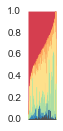

In [93]:
x = np.arange(0, skin_tax.shape[0])
ax = plt.subplot(1,1,1)
ax.fill_between(x,
                np.sum(skin_tax[['Other', 'Fusobacteria', 'Cyanobacteria', 'Tenericutes',
                                  'Verrucomicrobia', 'Actinobacteria', 'Proteobacteria',
                                  'Bacteroidetes']], 1),
                np.sum(skin_tax[['Other', 'Fusobacteria', 'Cyanobacteria', 'Tenericutes',
                                  'Verrucomicrobia', 'Actinobacteria', 'Proteobacteria',
                                  'Bacteroidetes', 'Firmicutes']], 1),
                color='#d53e4f',
                label='Actinobacteria')
ax.fill_between(x,
                np.sum(skin_tax[['Other', 'Fusobacteria', 'Cyanobacteria', 'Tenericutes',
                                  'Verrucomicrobia', 'Actinobacteria', 'Proteobacteria']], 1),
                np.sum(skin_tax[['Other', 'Fusobacteria', 'Cyanobacteria', 'Tenericutes',
                                  'Verrucomicrobia', 'Actinobacteria', 'Proteobacteria',
                                  'Bacteroidetes']], 1),
                color='#f46d43',
                label='Actinobacteria')

ax.fill_between(x,
                np.sum(skin_tax[['Other', 'Fusobacteria', 'Cyanobacteria', 'Tenericutes',
                                  'Verrucomicrobia', 'Actinobacteria']], 1),
                np.sum(skin_tax[['Other', 'Fusobacteria', 'Cyanobacteria', 'Tenericutes',
                                  'Verrucomicrobia', 'Actinobacteria', 'Proteobacteria']], 1),
                color='#fdae61',
                label='Proteobacteria')

ax.fill_between(x,
                np.sum(skin_tax[['Other', 'Fusobacteria', 'Cyanobacteria', 'Tenericutes',
                                  'Verrucomicrobia']], 1),
                np.sum(skin_tax[['Other', 'Fusobacteria', 'Cyanobacteria', 'Tenericutes',
                                  'Verrucomicrobia', 'Actinobacteria']], 1),
                color='#fee08b',
                label='Actinobacteria')

ax.fill_between(x,
                np.sum(skin_tax[['Other', 'Fusobacteria', 'Cyanobacteria',
                                  'Tenericutes']], 1),
                np.sum(skin_tax[['Other', 'Fusobacteria', 'Cyanobacteria',
                                  'Tenericutes', 'Verrucomicrobia']], 1),
                color='#fee08b',
                label='Verrucomicrobia')

ax.fill_between(x,
                np.sum(skin_tax[['Other', 'Fusobacteria', 'Cyanobacteria']], 1),
                np.sum(skin_tax[['Other', 'Fusobacteria', 'Cyanobacteria',
                                  'Tenericutes']], 1),
                color='#e6f598',
                label='Tenericutes')
ax.fill_between(x,
                np.sum(skin_tax[['Other', 'Fusobacteria']], 1),
                np.sum(skin_tax[['Other', 'Fusobacteria', 'Cyanobacteria']], 1),
                color='#abdda4',
                label='Cyanobacteria')
ax.fill_between(x,
                np.sum(skin_tax[['Other']], 1),
                np.sum(skin_tax[['Other', 'Fusobacteria']], 1),
                color='#3288bd',
                label='Fusobacteria')
ax.fill_between(x,
                 np.zeros(x.shape),
                 skin_tax['Other'],
                 color='#525252')
ax.set_xlim([0, len(x)])
ax.set_ylim([0, 1])
ax.set_xticklabels('')

ax.set_position((0.125, 0.125, 0.75, 0.75))
ax.figure.set_size_inches((0.0015*len(x), 2))

In [106]:
fecal_tax['Firmicutes']

10317.000026627    1
10317.000022903    1
10317.000022982    1
10317.000026637    1
10317.000012368    1
10317.000028591    1
10317.000001345    1
10317.000013941    1
10317.000001593    1
10317.000022905    1
10317.000028918    1
10317.000029371    1
10317.000029449    1
10317.000023060    1
10317.000023083    1
10317.000029296    1
10317.000001125    1
10317.000002309    1
10317.000022688    1
10317.000004711    1
10317.000023901    1
10317.000015121    1
10317.000023000    1
10317.000022617    1
10317.000028078    1
10317.000001501    1
10317.000020430    1
10317.000030959    1
10317.000013232    1
10317.000001249    1
                  ..
10317.000022121    0
10317.000023336    0
10317.000012209    0
10317.000010850    0
10317.000014815    0
10317.000028938    0
10317.000028861    0
10317.000028368    0
10317.000003425    0
10317.000028762    0
10317.000012402    0
10317.000015195    0
10317.000016748    0
10317.000001916    0
10317.000015578    0
10317.000028940    0
10317.0000277

In [42]:
most_common = ['Firmicutes', 'Bacteroidetes', 'Proteobacteria', 'Verrucomicrobia',
               'Actinobacteria', 'Tenericutes', 'Cyanobacteria', 'Fusobacteria', 'Other']

In [46]:
# tax['Other'] = 1 - 
tax['Other'] = 1 - tax[most_common[:-1]].sum(1)

In [61]:
tax

#OTU ID,k__Archaea;p__Crenarchaeota;c__MBGA,k__Archaea;p__Crenarchaeota;c__MCG,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota,k__Archaea;p__Euryarchaeota;c__Halobacteria,k__Archaea;p__Euryarchaeota;c__Methanobacteria,k__Archaea;p__Euryarchaeota;c__Methanomicrobia,k__Archaea;p__Euryarchaeota;c__Thermococci,k__Archaea;p__Euryarchaeota;c__Thermoplasmata,k__Archaea;p__[Parvarchaeota];c__[Parvarchaea],k__Bacteria;p__;c__,...,k__Bacteria;p__Verrucomicrobia;c__[Methylacidiphilae],k__Bacteria;p__Verrucomicrobia;c__[Pedosphaerae],k__Bacteria;p__Verrucomicrobia;c__[Spartobacteria],k__Bacteria;p__WPS-2;c__,k__Bacteria;p__WS2;c__SHA-109,k__Bacteria;p__WS3;c__PRR-12,k__Bacteria;p__WS4;c__,k__Bacteria;p__ZB3;c__,k__Bacteria;p__[Caldithrix];c__KSB1,k__Bacteria;p__[Thermi];c__Deinococci
10317.000005636,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0.000000,...,0.000000,0.000000,0.000095,0.000000,0,0.000000,0.000000,0,0,0.000378
10317.000005637,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0.000000,...,0.000000,0.000082,0.000000,0.000000,0,0.000000,0.000000,0,0,0.000673
10317.000005634,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0.000000,...,0.000000,0.000000,0.000000,0.000295,0,0.000000,0.000000,0,0,0.000442
10317.000007117,0.000000,0.000000,0.000055,0.000000,0.043654,0.000000,0,0,0,0.000000,...,0.000000,0.000009,0.000000,0.000000,0,0.000000,0.000000,0,0,0.000027
10317.000015465,0.000000,0.000000,0.000053,0.000026,0.000000,0.000000,0,0,0,0.000026,...,0.000000,0.000053,0.000000,0.000053,0,0.000000,0.000000,0,0,0.000343
10317.000009713,0.000000,0.000000,0.000028,0.000000,0.000000,0.000000,0,0,0,0.000083,...,0.000000,0.000028,0.000361,0.000055,0,0.000000,0.000000,0,0,0.000472
10317.000005597,0.000000,0.000000,0.000527,0.000000,0.000000,0.000000,0,0,0,0.000000,...,0.000000,0.001580,0.006319,0.000000,0,0.000000,0.000000,0,0,0.002633
10317.000007115,0.000000,0.000000,0.000436,0.000000,0.000436,0.000018,0,0,0,0.000036,...,0.000027,0.000284,0.000604,0.000009,0,0.000009,0.000000,0,0,0.000151
10317.000007112,0.000000,0.000000,0.000160,0.000000,0.000000,0.000011,0,0,0,0.000000,...,0.000000,0.000123,0.000116,0.000000,0,0.000007,0.000000,0,0,0.000105
10317.000005598,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0.000000,...,0.000000,0.000225,0.002696,0.000944,0,0.000000,0.000000,0,0,0.001977


In [ ]:
agplots.make_stack_plot(tax.data, tax.index, '',)